In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv("winequality-red.csv")
data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

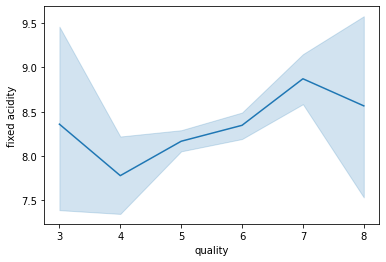

In [10]:
sns.lineplot(x="quality", y="fixed acidity",data=data)


In [11]:
print(data.quantile(.95))
data.describe()

fixed acidity            11.8000
volatile acidity          0.8400
citric acid               0.6000
residual sugar            5.1000
chlorides                 0.1261
free sulfur dioxide      35.0000
total sulfur dioxide    112.1000
density                   1.0000
pH                        3.5700
sulphates                 0.9300
alcohol                  12.5000
quality                   7.0000
Name: 0.95, dtype: float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

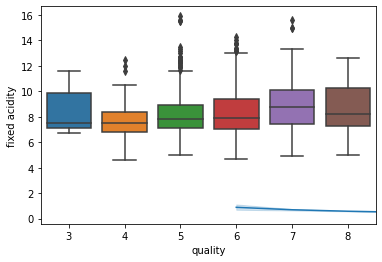

In [12]:
sns.lineplot(x="quality", y="volatile acidity",data=data)
sns.boxplot(x="quality",y="fixed acidity",data= data)

In [13]:
df_cols = [col_name for col_name in data.columns]
a = len(df_cols)
for i in range(0,a):
    print(i // 3 ,"row", i % 4 ,"cols")
    

0 row 0 cols
0 row 1 cols
0 row 2 cols
1 row 3 cols
1 row 0 cols
1 row 1 cols
2 row 2 cols
2 row 3 cols
2 row 0 cols
3 row 1 cols
3 row 2 cols
3 row 3 cols


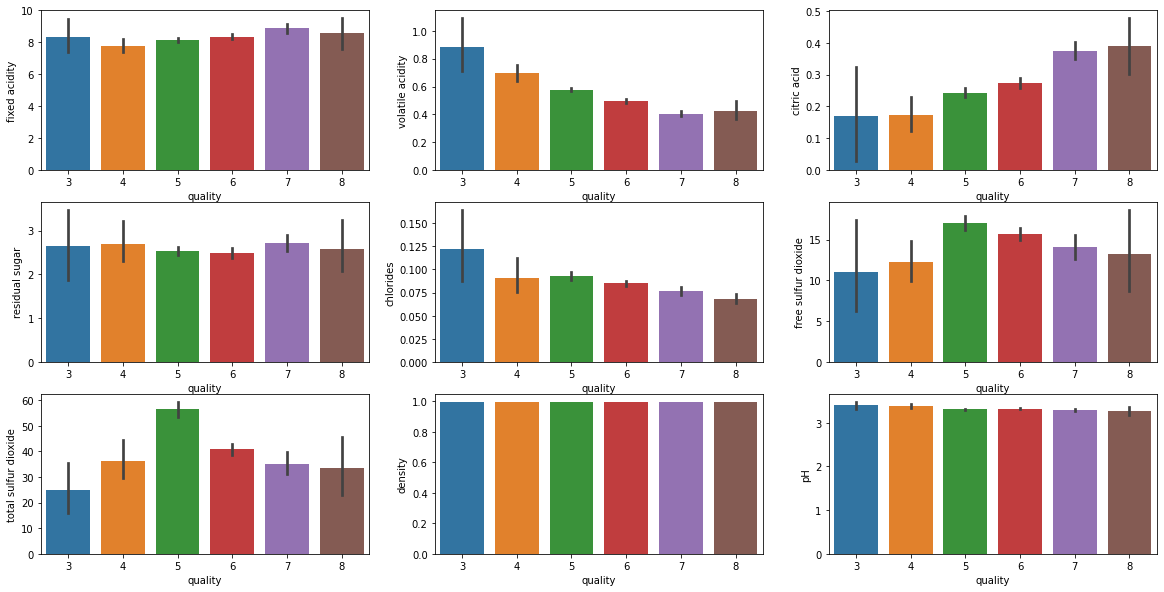

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(20,10))
for i in range(0, 9):
    rows = i//3
    cols = i % 3
    ax = axs[rows, cols]
    plot = sns.barplot(x="quality", y=df_cols[i], data=data, ax=ax)

In [16]:
print(data.quantile(.95))
data.describe()

fixed acidity            11.8000
volatile acidity          0.8400
citric acid               0.6000
residual sugar            5.1000
chlorides                 0.1261
free sulfur dioxide      35.0000
total sulfur dioxide    112.1000
density                   1.0000
pH                        3.5700
sulphates                 0.9300
alcohol                  12.5000
quality                   7.0000
Name: 0.95, dtype: float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


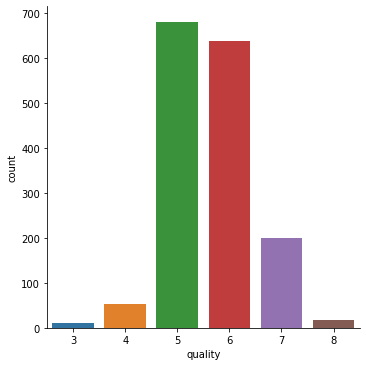

In [20]:
sns.catplot(x="quality",data = data,kind="count")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

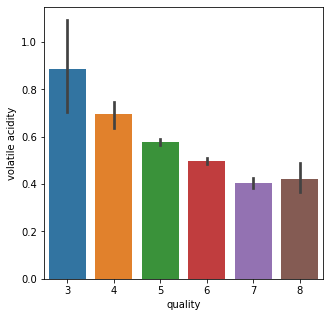

In [21]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile acidity",data= data)

In [26]:
correlation = data.corr()


<AxesSubplot:>

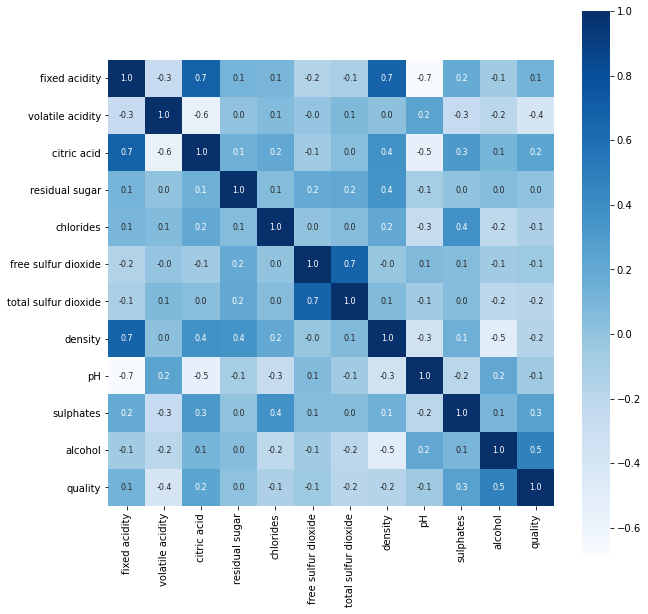

In [29]:
# heat map to understand the correlation between the data 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")

In [34]:
# separete the data for moodel
X = data.drop("quality", axis=1)
X
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
a = data[["volatile acidity", "citric acid"]]
a


,volatile acidity,citric acid
0,0.700,0.00
1,0.880,0.00
2,0.760,0.04
3,0.280,0.56
4,0.700,0.00
...,...,...
1594,0.600,0.08
1595,0.550,0.10
1596,0.510,0.13
1597,0.645,0.12


In [36]:
b = data[["quality"]]
b

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [38]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)

In [59]:
X_train, X_test, b_train, b_test = train_test_split(X,b,test_size=0.2)

In [39]:
clf = RandomForestClassifier()
clf.fit(a_train, b_train)


<ipython-input-39-14461727b646>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(a_train, b_train)


RandomForestClassifier()

In [64]:
clf.fit(X_train, b_train)

<ipython-input-64-a2ea6a5d2a48>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, b_train)


RandomForestClassifier()

In [65]:
c_predict = clf.predict(X_test)
accu = metrics.accuracy_score(c_predict,b_test)
accu

0.709375

In [55]:
b_predict = clf.predict(a_test)
print(b_predict)
print(b_predict.shape)
b_test

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 11 features as input.

In [43]:
test_accuracy = metrics.accuracy_score(b_test,b_predict)
test_accuracy

0.5125